In [2]:
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


Shape of the original image is: (128, 128, 3)
k: 10


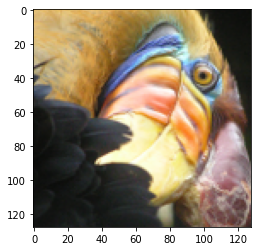

In [10]:
original_image= plt.imread('/content/drive/MyDrive/Colab Notebooks/ML_Codes/kmeans_cluster/bird_small.png')
plt.imshow(original_image)
print("Shape of the original image is:",original_image.shape)
original_image=original_image/255.0
#plt.imshow(original_image)
X_img=np.reshape(original_image,(original_image.shape[0]*original_image.shape[1],3))

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 10
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 
#print(initial_centroids.shape)
# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
#print(centroids.shape)
#print(np.unique(idx))

In [ ]:
#print(idx.shape)
#print('ori:',original_image)
np.set_printoptions(threshold=np. inf)
print('centroids',centroids)

#print(X_recovered)

centroids [[0.00332487 0.00267439 0.00165818]
 [0.00160489 0.00130148 0.00108961]
 [0.00264026 0.00192002 0.00092719]
 [0.003797   0.00354706 0.00290378]
 [0.00286815 0.00278509 0.00287457]
 [0.00050384 0.00053638 0.00050137]
 [0.00034365 0.00037131 0.00032949]
 [0.00024683 0.00026919 0.00023004]
 [0.002193   0.00199993 0.00198187]
 [0.0008696  0.00081718 0.00078958]]


(16384, 3)


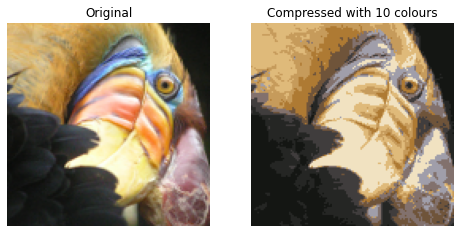

In [11]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 
print(X_recovered.shape)
X_recovered = np.reshape(X_recovered, original_image.shape) 
#plotting
fig, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(original_image*255.0)
ax[0].set_title('Original')
ax[0].set_axis_off()
# Display compressed image
ax[1].imshow(X_recovered*255.0)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [7]:
#init
def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    return centroids

In [6]:
def run_kMeans(X,centroids,max_iters):
  m,n=X.shape
  idX=np.zeros(m,dtype=int)
  K=centroids.shape[0]
  print('k:',K)
  for i in range(max_iters):
    #find the closest centriod to each sample m and store the id of the centroids in idX
    idX=find_closest_centroid(X,centroids)
    #now we reassign the centroids 
    centroids=compute_centroids(X,idX,K)
  return centroids,idX


In [5]:
#this function finds the closest centroid to each of the samples and stores the id of those centroid 
def find_closest_centroid(X,centroids):
  idX=np.zeros(X.shape[0],dtype=int)
  for i in range(X.shape[0]):
    distance=[]
    for j in range(centroids.shape[0]):
      distance.append(np.linalg.norm(X[i]-centroids[j]))
    #print(np.min(distance),np.argmin(distance))
    #print("i:",i,np.min(distance),np.argmin(distance),distance)
    idX[i]=np.argmin(distance)
    #print(np.unique(idX))
  return idX

In [4]:
def compute_centroids(X,idX,K):
  centroids=np.zeros((K,X.shape[1]))
  for i in range(K):
    Y=X[np.where(idX==i)]
    #print('Y at i=',i,Y)
    centroids[i]=(1/Y.shape[0])*np.sum(Y,axis=0,keepdims=False)
  return centroids

K-means clustering will group similar colors together into ‘k’ clusters (say k=64) of different colors (RGB values). Therefore, each cluster centroid is the representative of the color vector in RGB color space of its respective cluster. Now, these ‘k’ cluster centroids will replace all the color vectors in their respective clusters. Thus, we need to only store the label for each pixel which tells the cluster to which this pixel belongs. Additionally, we keep the record of color vectors of each cluster center.

As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)


## Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps:
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).


* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)

* For every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* If two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.


In [ ]:
#WHat does np.random.permutation do?
#Randomly permute a sequence, or return a permuted range.
array=np.random.permutation(10)
print(array[:5])#prints first 5 elements generated

[7 2 6 4 9]


In [ ]:
#Numpy argmax returns the indices of the maximum value along the axis of a numpy array.
#numpy.argmax(a, axis=None, out=None)
arr = np.array([[7,14,57,22] ,[22,25,5,26]])
print(np.argmax(arr))
print(np.argmax(arr,axis = 0)) #find maximum along eaxh of the column

2
[1 1 0 1]
